In [59]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Lambda, Activation, MaxPooling2D
from keras.layers.convolutional import Convolution2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
import errno
import json
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.misc
from scipy.ndimage import rotate
from scipy.stats import bernoulli
import helper

tf.python.control_flow_ops = tf

number_of_epochs = 1
%load_ext autoreload
%autoreload 2
learning_rate = 1e-4
activation_relu = 'relu'

In [9]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [176]:
k = helper.generate_next_batch()

In [178]:
#next(k)

In [55]:
from helper import get_next_image_files, generate_new_image

In [57]:
import matplotlib.pyplot as plt

#next(k)

d1.iloc[0]

d1 = pd.read_csv('data/driving_log.csv')

d2 = pd.read_csv('t2_train/driving_log.csv', header=None)
d2.columns = d1.columns
d2.to_csv('t2_train/driving_log.csv', index=False)
d1.iloc[0]
8037 * 3

In [ ]:
d2 = pd.read_csv('t2_train/driving_log.csv')

d2_valid= d2.sample(frac=.20, replace=False)

d2_tr = d2.drop(d2_valid.index)

In [71]:
number_of_samples_per_epoch = 20032
number_of_validation_samples = d2.shape[0] * 3

In [69]:
model.fi

6285

In [162]:
def add_conv_block(model, nb_filter, nb_row, nb_col, subsample=(2,2)):
    model.add(Convolution2D(nb_filter, nb_row, nb_col,
                            activation='relu', border_mode='same', subsample=subsample))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
    
    
def add_dense_block(n_hidden):
    model.add(Dense(n_hidden, activation='relu'))
    
    import pandas as pd
%matplotlib inline
def plot_history(history):
    pd.DataFrame(history.history).plot(style='-o')

In [130]:
# Source:  https://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf
model = Sequential()

model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape=(64, 64, 3)))
add_conv_block(model, 24, 5, 5)
add_conv_block(model, 36, 5, 5)
add_conv_block(model,48, 5, 5)
add_conv_block(model, 64, 3, 3, subsample=(1,1))
add_conv_block(model, 64, 3, 3, subsample=(1,1))

model.add(Flatten())
add_dense_block(1164)
model.add(BatchNormalization())
add_dense_block(100)
add_dense_block(50)
add_dense_block(10)

model.add(Dense(1))


In [117]:
#model.summary()

In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [4]:
model.fit_generator?

In [3]:
model = load_model('m10_bn.h5')

In [79]:
from keras.callbacks import ModelCheckpoint

In [184]:
filepath="t2-weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [180]:
%%time

#model.compile(optimizer=Adam(learning_rate), loss="mse")


# create two generators for training and validation
train_gen = helper.generate_next_batch()
validation_gen = helper.generate_next_batch(path='t2_train', data=d2_valid)

history = model.fit_generator(train_gen,
                              samples_per_epoch=100,
                              nb_epoch=3,
                              validation_data=validation_gen,
                              callbacks=callbacks_list,
                              nb_val_samples=d2_valid.shape[0] * 3,
                              verbose=1)


Epoch 1/3
 64/100 [==================>...........] - ETA: 0s - loss: 0.0092

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


128/100 [======================================] - 7s - loss: 0.0145 - val_loss: 0.1984
Epoch 2/3
128/100 [======================================] - 5s - loss: 0.0148 - val_loss: 0.2077
Epoch 3/3
128/100 [======================================] - 6s - loss: 0.0124 - val_loss: 0.2091
CPU times: user 22.4 s, sys: 276 ms, total: 22.7 s
Wall time: 19.2 s


In [185]:
train_gen = helper.generate_next_batch(path='t2_train', data=d2_tr)
validation_gen = helper.generate_next_batch(path='t2_train', data=d2_valid)


In [186]:
history = model.fit_generator(train_gen,
                              samples_per_epoch=len(d2_tr),
                              nb_epoch=10,
                              callbacks=callbacks_list,
                              validation_data=validation_gen,
                              nb_val_samples=d2_valid.shape[0] * 3,
                              verbose=1)

Epoch 1/10
1664/1676 [============================>.] - ETA: 0s - loss: 0.1108

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: val_loss improved from inf to 0.12227, saving model to t2-weights-improvement-00-0.12.hdf5
1728/1676 [==============================] - 13s - loss: 0.1121 - val_loss: 0.1223
Epoch 2/10
1728/1676 [==============================] - 11s - loss: 0.1003 - val_loss: 0.1272
Epoch 3/10
1728/1676 [==============================] - 11s - loss: 0.1135 - val_loss: 0.1076
Epoch 4/10
1728/1676 [==============================] - 11s - loss: 0.1189 - val_loss: 0.1255
Epoch 5/10
1728/1676 [==============================] - 11s - loss: 0.1091 - val_loss: 0.1120
Epoch 6/10
1728/1676 [==============================] - 11s - loss: 0.1027 - val_loss: 0.1093
Epoch 7/10
1728/1676 [==============================] - 11s - loss: 0.1141 - val_loss: 0.1125
Epoch 8/10
1728/1676 [==============================] - 11s - loss: 0.1087 - val_loss: 0.1148
Epoch 9/10
1728/1676 [==============================] - 11s - loss: 0.1134 - val_loss: 0.1109
Epoch 10/10
1728/1676 [==============================] - 11s 

In [188]:
ls

bean_bag.mp4  m20_bn_t1_only.h5  t2-weights-improvement-00-0.12.hdf5
data/         Model-Final.ipynb  t2-weights-improvement-00-0.13.hdf5
Dataset/      Model.ipynb        t2-weights-improvement-00-0.17.hdf5
Dataset.zip   __pycache__/       t2-weights-improvement-02-0.11.hdf5
drive.py      README.md          video.py
examples/     t2-10.hdf5         writeup_template.md
helper.py     t2_train/
m10_bn.h5     t2_train.zip


In [75]:
model.save('m20_bn_t1_only.h5')

In [108]:
#ls t2

In [183]:

history2 = model.fit_generator(train_gen,
                              samples_per_epoch=number_of_validation_samples,
                              nb_epoch=10,
                              validation_data=validation_gen,
                        
                              callbacks=callbacks_list,
                              nb_val_samples=number_of_validation_samples,
                              verbose=1)

Epoch 1/10
6272/6285 [============================>.] - ETA: 0s - loss: 0.1366

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: val_loss improved from -inf to 0.16854, saving model to t2-weights-improvement-00-0.17.hdf5
6336/6285 [==============================] - 54s - loss: 0.1375 - val_loss: 0.1685
Epoch 2/10
6336/6285 [==============================] - 51s - loss: 0.1293 - val_loss: 0.1503
Epoch 3/10
6336/6285 [==============================] - 51s - loss: 0.1246 - val_loss: 0.1253
Epoch 4/10
6336/6285 [==============================] - 51s - loss: 0.1182 - val_loss: 0.1355
Epoch 5/10
6272/6285 [============================>.] - ETA: 0s - loss: 0.1130

KeyboardInterrupt: 

In [ ]:
plot_history(history2)

In [107]:
model.save('t2-20_val_.hdf5')

In [101]:
#m2.summary()

In [97]:
from keras.models import load_model

In [106]:
!date

Sun Aug 27 00:09:48 UTC 2017


In [105]:
ls -lt

total 464984
-rw-rw-r-- 1 carnd carnd     35578 Aug 27 00:09 Model.ipynb
-rw-rw-r-- 1 carnd carnd  25500232 Aug 26 23:58 t2-weights-improvement-00-0.13.hdf5
-rw-rw-r-- 1 carnd carnd  25500232 Aug 26 23:51 m20_bn_t1_only.h5
-rw-rw-r-- 1 carnd carnd      4073 Aug 26 23:34 drive.py
drwxrwxr-x 2 carnd carnd      4096 Aug 26 23:28 __pycache__/
-rw-rw-r-- 1 carnd carnd      6607 Aug 26 23:28 helper.py
-rw-r--r-- 1 carnd carnd  62880558 Aug 26 23:16 t2_train.zip
drwxr-xr-x 3 carnd carnd      4096 Aug 26 23:12 t2_train/
-rw-r--r-- 1 carnd carnd 336660046 Aug 26 22:01 Dataset.zip
-rw-rw-r-- 1 carnd carnd       133 Aug 26 21:35 bean_bag.mp4
drwxrwxr-x 2 carnd carnd      4096 Aug 26 21:35 examples/
-rw-rw-r-- 1 carnd carnd      6132 Aug 26 21:35 README.md
-rw-rw-r-- 1 carnd carnd       750 Aug 26 21:35 video.py
-rw-rw-r-- 1 carnd carnd      5880 Aug 26 21:35 writeup_template.md
-rw-rw-r-- 1 carnd carnd  25500272 Aug 25 23:35 m10_bn.h5
drwxrwxr-x 3 carnd carnd      4096 Aug 25 21:12 data/
drwxrwxr

In [ ]:
# create two generators for training and validation
train_gen = helper.generate_next_batch()
validation_gen = generate_next_batch(path='t2_train')


In [63]:
model = model.load

In [110]:
history2 = model.fit_generator(train_gen,
                              samples_per_epoch=number_of_samples_per_epoch,
                              nb_epoch=10,
                              validation_data=validation_gen,
                              nb_val_samples=number_of_validation_samples,
                              verbose=1)

Epoch 1/10
20032/20032 [==============================] - 124s - loss: 0.0152 - val_loss: 0.0132
Epoch 2/10
20032/20032 [==============================] - 122s - loss: 0.0142 - val_loss: 0.0150
Epoch 3/10
20032/20032 [==============================] - 122s - loss: 0.0138 - val_loss: 0.0130
Epoch 4/10
20032/20032 [==============================] - 122s - loss: 0.0132 - val_loss: 0.0142
Epoch 5/10
20032/20032 [==============================] - 122s - loss: 0.0131 - val_loss: 0.0136
Epoch 6/10
20032/20032 [==============================] - 123s - loss: 0.0128 - val_loss: 0.0117
Epoch 7/10
20032/20032 [==============================] - 123s - loss: 0.0120 - val_loss: 0.0114
Epoch 8/10
20032/20032 [==============================] - 122s - loss: 0.0122 - val_loss: 0.0122
Epoch 9/10
20032/20032 [==============================] - 121s - loss: 0.0120 - val_loss: 0.0117
Epoch 10/10
20032/20032 [==============================] - 122s - loss: 0.0115 - val_loss: 0.0107


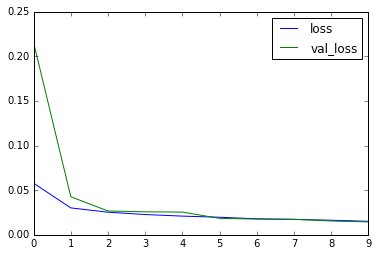

In [102]:
import keras

In [ ]:
keras.loa